In [1]:
from PIL import Image
from sklearn.decomposition import PCA
import numpy as np

Let's see the image!

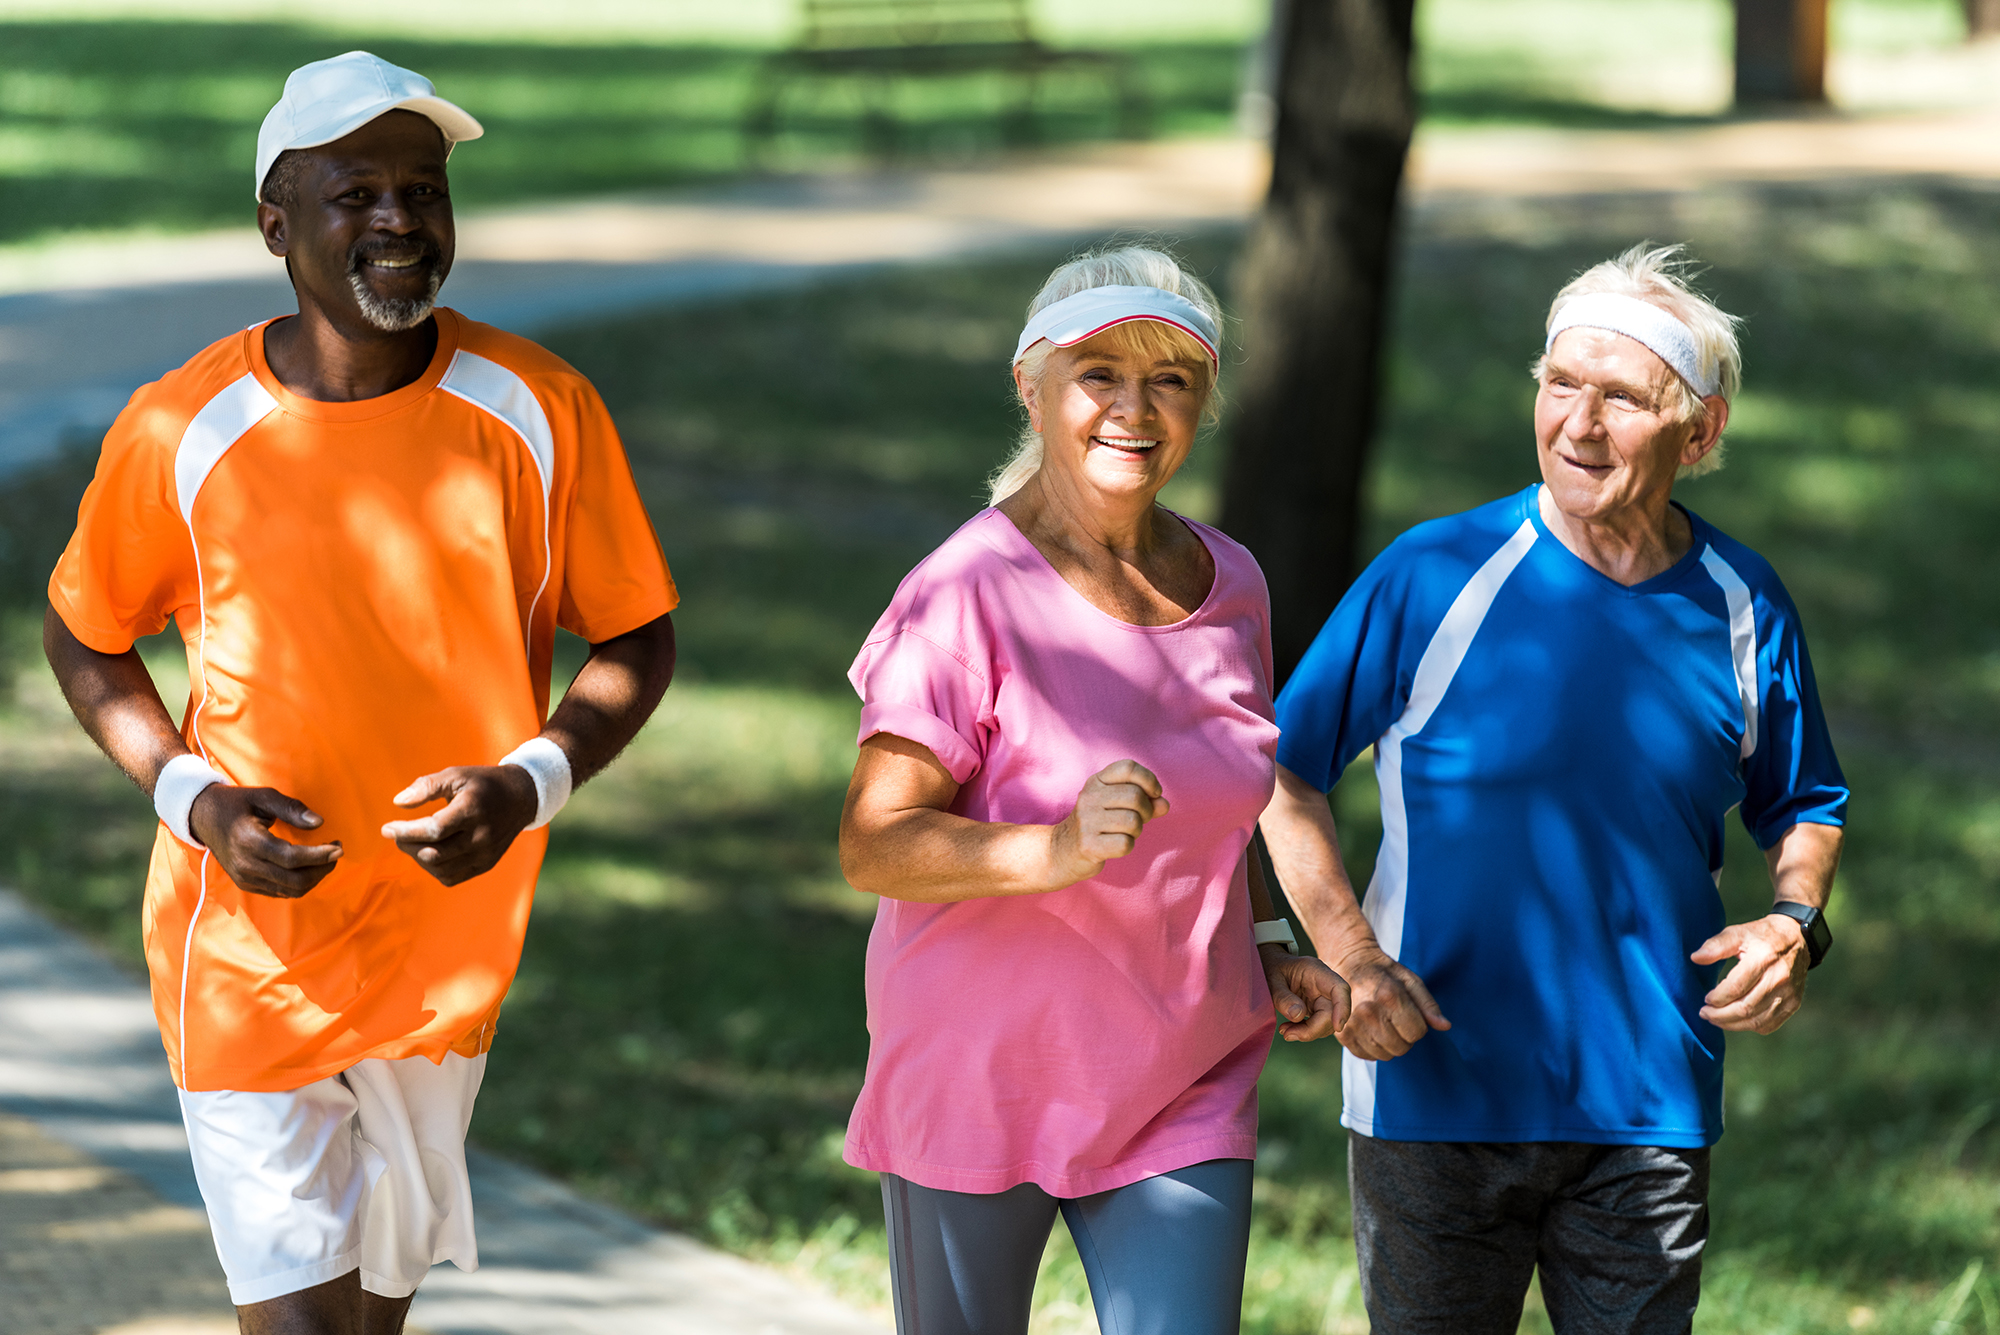

In [2]:
path = 'people.jpeg'
image = Image.open(path)
image.show()

In order to make PCA easier, let's transform our matrix of pixels into array of pixels.

In [3]:
RGB = np.array(image)
rows, columns, colors = RGB.shape
flat_RGB = RGB.reshape(rows * columns, colors)

Let's perform PCA.

First, we build PCA object and take 3 components.

Then we perform transformation to new dimensions and return back result.

Finally, we build compressed image from our new array.

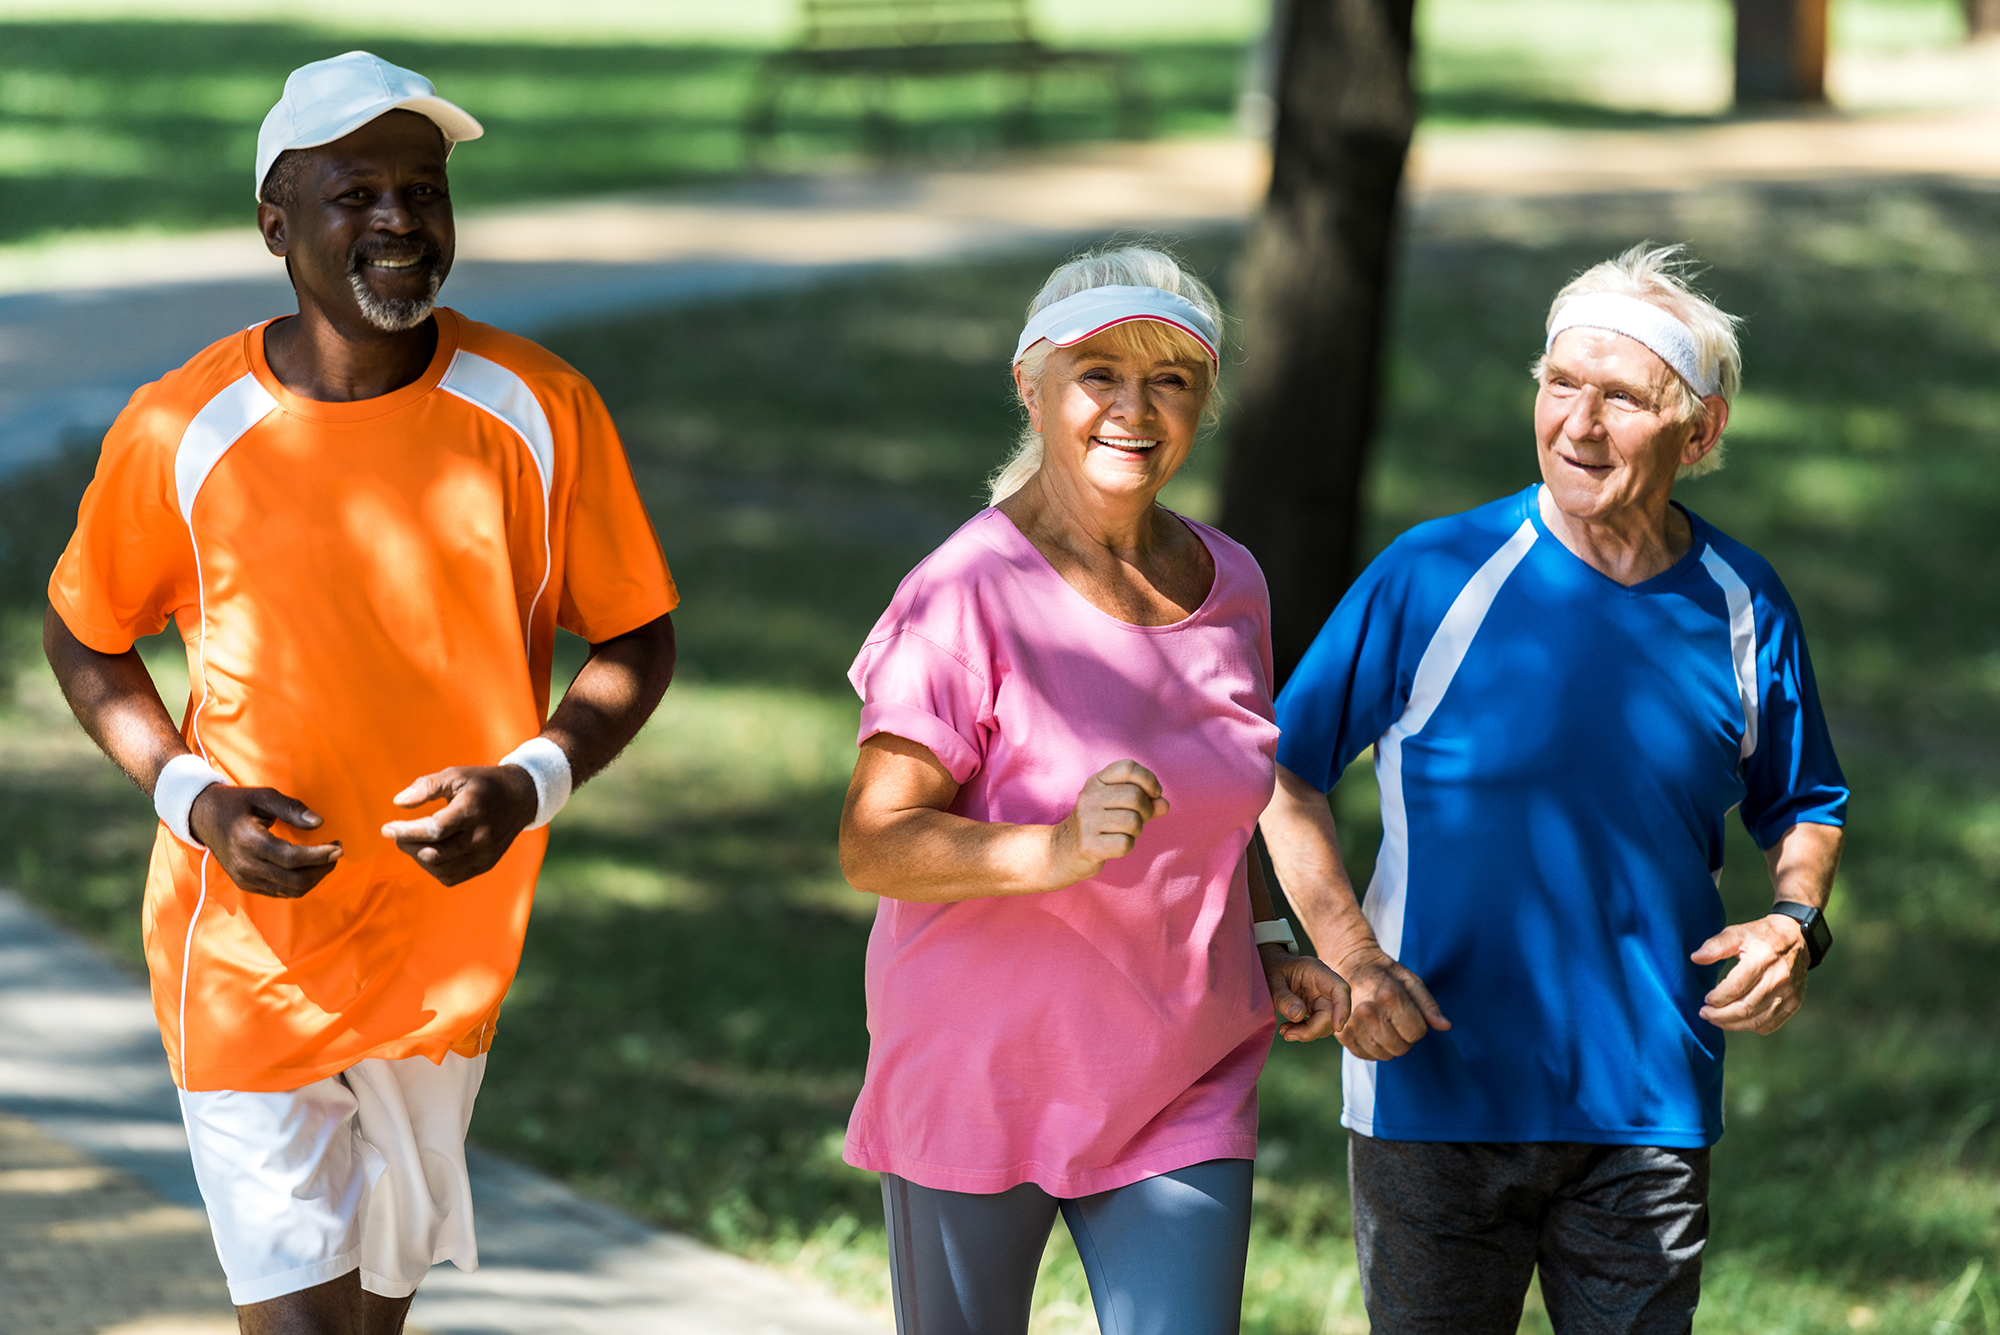

In [4]:
pca = PCA(n_components = 3)
transformed_flat_RGB = pca.fit_transform(flat_RGB)
new_flat_RGB = pca.inverse_transform(transformed_flat_RGB).astype(np.uint8)
new_RGB = new_flat_RGB.reshape(rows, columns, colors)
new_image = Image.fromarray(new_RGB)
new_image

Finally, we save the picture.

As we see, people.jpeg is 1653 KB and compressed_people.jpeg is 244 KB, however there is no visible reduction in clearity of the image.

As result, our compression using PCA was done. We reduced the size of the image in more than 6 times!

In [5]:
save_path = 'compressed_people.jpeg'
new_image.save(save_path)